In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


In [3]:
print(X_test.shape)

(10000, 28, 28)


In [4]:
print('Shape of X_train', str(X_train.shape))
print('Number of sample in training dataset', str(len(X_train)))
print('number of labels in the test dataset', str(len(y_train)))

print('Number of sample in testing dataset', str(len(X_test)))
print('number of labels in the test dataset', str(len(y_test)))

print('Dimensions of X_test', str(X_test[0].shape))
print('Labels in y_test', str(y_test.shape))

Shape of X_train (60000, 28, 28)
Number of sample in training dataset 60000
number of labels in the test dataset 60000
Number of sample in testing dataset 10000
number of labels in the test dataset 10000
Dimensions of X_test (28, 28)
Labels in y_test (10000,)


In [5]:
#Dispaly some image using openCV
import cv2
import numpy as np
for i in range(0, 6):
    img = X_train[np.random.randint(0, len(X_train))]
    name = "Sample"+str(i)
    
    cv2.imshow(name, img)
    cv2.waitKey(0)
cv2.destroyAllWindows()

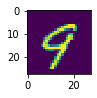

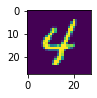

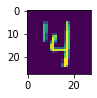

In [6]:
import matplotlib.pyplot as plt

for i in range(0, 3):
    plt.subplot(331)
    plt.imshow(X_train[np.random.randint(0, len(X_train))])
    plt.show()

## Getting data in correct shape
### No of Samples, Rows, Cols, Depth
#### Example : 60000 * 28 * 28 * 1 if grayscale
#### Example : 60000 * 28 * 28 * 3 if color

In [7]:
img_rows = X_train[0].shape[0]
img_cols = X_train[1].shape[0]

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [8]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

X_train shape (60000, 28, 28, 1)
X_test shape (10000, 28, 28, 1)


In [9]:
##OneHotEncoding
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print('Number of classes', str(y_test.shape[0]))

num_classes = y_test.shape[1]
num_pixels = X_train.shape[1] * X_train.shape[2]

Number of classes 10000


In [10]:
num_classes

10

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape = input_shape, activation = 'relu'))

model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(output_dim = 128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = SGD(0.01))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

/home/aryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`


In [12]:
batch_size = 32
epochs = 10

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1,
                   validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test Loss', score[0])
print('Test Accuracy', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.4357 - accuracy: 0.8710 - val_loss: 0.1841 - val_accuracy: 0.9430
Epoch 2/10
60000/60000 [==============================] - 138s 2ms/step - loss: 0.1723 - accuracy: 0.9485 - val_loss: 0.1322 - val_accuracy: 0.9607
Epoch 3/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.1183 - accuracy: 0.9643 - val_loss: 0.0817 - val_accuracy: 0.9754
Epoch 4/10
60000/60000 [==============================] - 133s 2ms/step - loss: 0.0898 - accuracy: 0.9727 - val_loss: 0.0687 - val_accuracy: 0.9783
Epoch 5/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0716 - accuracy: 0.9783 - val_loss: 0.0589 - val_accuracy: 0.9808
Epoch 6/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0598 - accuracy: 0.9816 - val_loss: 0.0568 - val_accuracy: 0.9818
Epoch 7/10
60000/60000 [==============================] - 135s

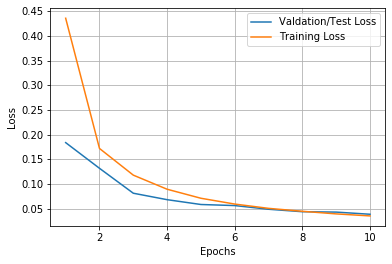

In [13]:
import matplotlib.pyplot as plt

history_dic = history.history

loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']
epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label='Valdation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

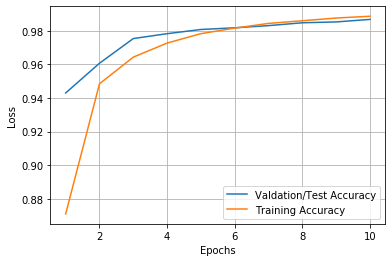

In [14]:
import matplotlib.pyplot as plt

history_dic = history.history

acc_values = history_dic['accuracy']
val_acc_values = history_dic['val_accuracy']
epochs = range(1, len(acc_values)+1)

line1 = plt.plot(epochs, val_acc_values, label='Valdation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
model.save('./mnist-2.h5')

In [16]:
from keras.models import load_model
classifier = load_model('./mnist-2.h5')

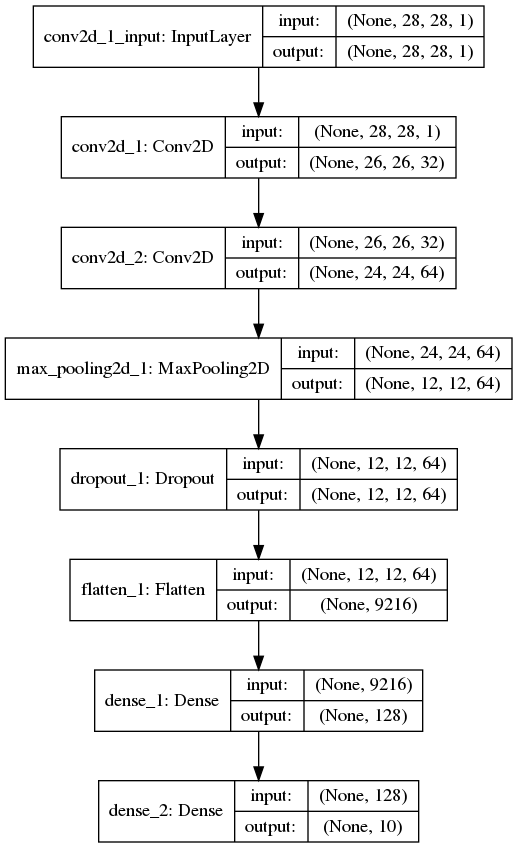

In [18]:
#sudo apt-get install graphviz
from keras.utils.vis_utils import plot_model
plot_model(model,
               to_file='model.png',
               show_shapes=True,
               show_layer_names=True,
               rankdir='TB')

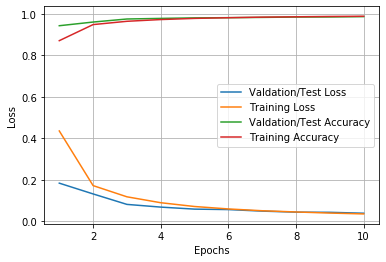

In [21]:
import matplotlib.pyplot as plt

history_dic = history.history

loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']
epochs = range(1, len(loss_values)+1)

acc_values = history_dic['accuracy']
val_acc_values = history_dic['val_accuracy']
epochs_acc = range(1, len(acc_values)+1)

line1 = plt.plot(epochs, val_loss_values, label='Valdation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
line3 = plt.plot(epochs_acc, val_acc_values, label='Valdation/Test Accuracy')
line4 = plt.plot(epochs_acc, acc_values, label='Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()